In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import trange
from tqdm import tqdm
from einops import rearrange, repeat
from pathlib import Path
import seaborn as sns
import datetime
import math
import os
import time
import sys
import re
import json

%matplotlib inline

In [2]:
Anode_datasets = sorted([x for x in Path("../data/extracted_data/230412_Anode/").glob("*.json")])
Anode_datasets

[PosixPath('../data/extracted_data/230412_Anode/20230412_105553_0__01_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_105804_0__02_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_110032_0__03_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_110249_0__04_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_110451_0__05_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_110735_0__06_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_110928_0__07_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_111152_0__08_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_111719_0__09_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_111935_0__10_rule_based.json'),
 PosixPath('../data/extracted_data/230412_Anode/20230412_112153_0__11_rule_based.json'),
 PosixPath('../data/e

In [39]:
with open(str(Anode_datasets[2]), 'r') as file:
    ref = json.load(file)

with open(str(Anode_datasets[7]), 'r') as file:
    compare = json.load(file)

In [47]:
ref['Bead_01']

{'lo_features': {'lo_height_mean': 3.28536659375,
  'lo_height_min': 3.0661,
  'lo_height_peak': 3.378247,
  'lo_height_std': 0.036076697480442656,
  'lo_fwhm': 100,
  'lo_area': 322.79222500000003},
 'br_features': {'br_peak': 7.149317999999999,
  'br_peak_time': 19,
  'br_diff_peak': 6.001541},
 'nir_features': {'nir_peak': 0.316967,
  'nir_reach_time': 44,
  'nir_over_area': 0.0,
  'nir_extra_time': 4,
  'nir_extra_area': 0.32169000000000003,
  'nir_sum_area': 10.728292999999999},
 'vis_features': {'vis_peak': 0.231296,
  'vis_reach_time': 37,
  'vis_over_area': 0.0,
  'vis_extra_time': 3,
  'vis_extra_area': 0.292243}}

In [40]:
def find_values_with_key_in_nested_dict(dictionary, key_to_find, results=None):
    if results is None:
        results = []

    for key, value in dictionary.items():
        if isinstance(value, dict):
            find_values_with_key_in_nested_dict(value, key_to_find, results)
        elif key == key_to_find:
            results.append(value)

    return np.array(results)


In [53]:
def compare_feature_plot(ref, comp, key):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(find_values_with_key_in_nested_dict(ref, key), label=f'ref')
    plt.plot(find_values_with_key_in_nested_dict(comp, key), label=f'comp')
    plt.title(f'{key}')
    plt.legend()
    plt.show() 

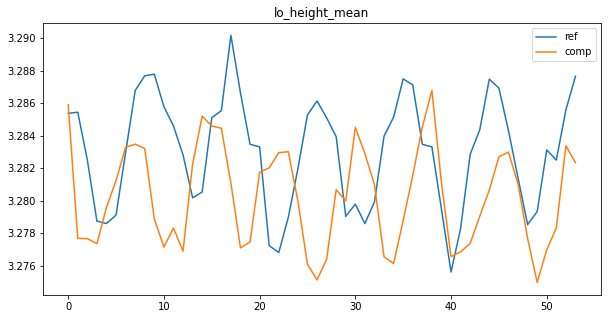

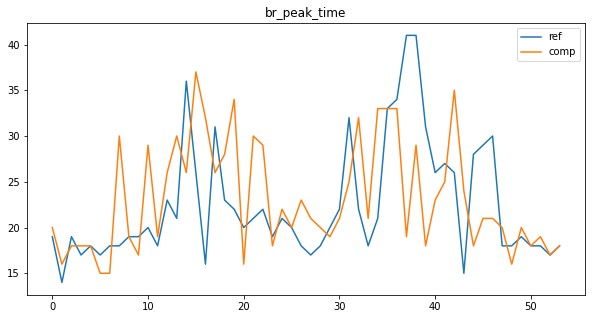

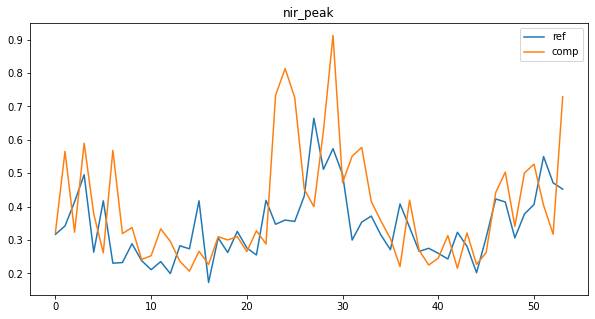

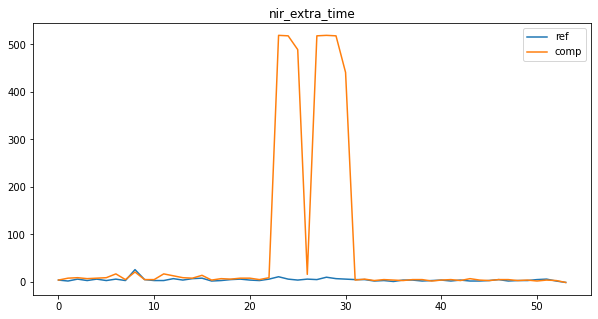

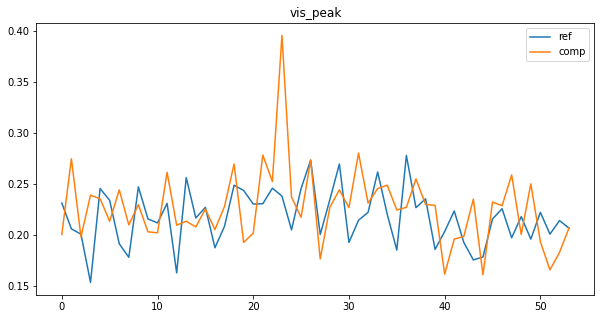

In [55]:
feature_list = ['lo_height_mean', 'br_peak_time', 'nir_peak', 'nir_extra_time', 'vis_peak']
for i in feature_list:
    compare_feature_plot(ref, compare, i)

In [56]:
Cathode_datasets = sorted([x for x in Path("../data/extracted_data/230330_Cathode/").glob("*.json")])
Cathode_datasets

[PosixPath('../data/extracted_data/230330_Cathode/20230330_134146_0__02_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_134728_0__03_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_134935_0__04_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_135219_0__05_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_135426_0__06_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_140214_0__07_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_140723_0__08_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_140937_0__09_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_141214_0__10_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_141439_0__11_rule_based.json'),
 PosixPath('../data/extracted_data/230330_Cathode/20230330_141754_0__12_rule_based.json'),

In [61]:
with open(str(Cathode_datasets[0]), 'r') as file:
    ref = json.load(file)

with open(str(Cathode_datasets[4]), 'r') as file:
    compare = json.load(file)

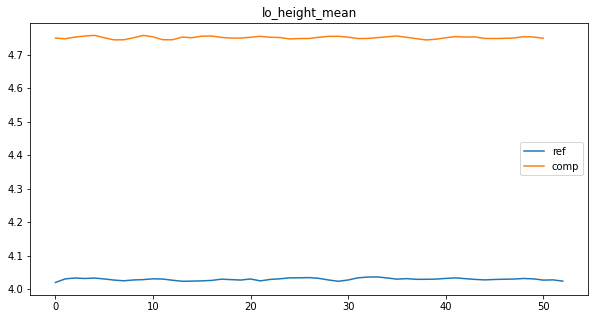

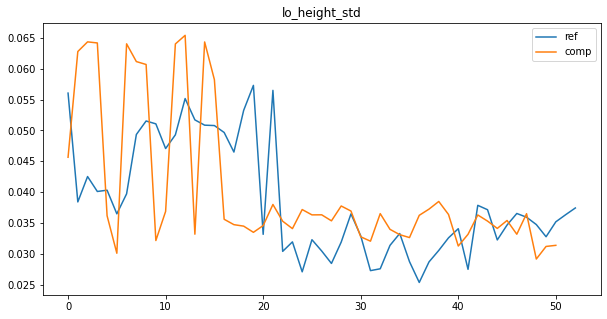

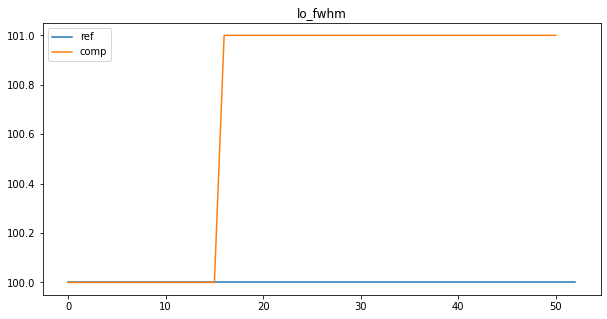

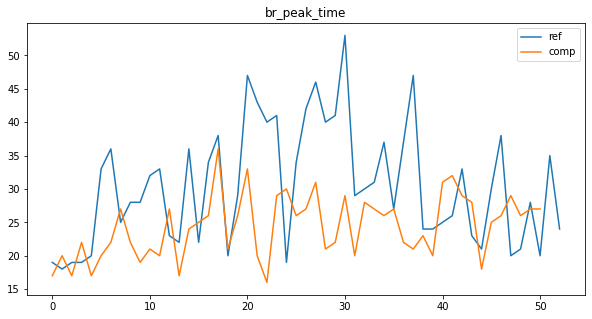

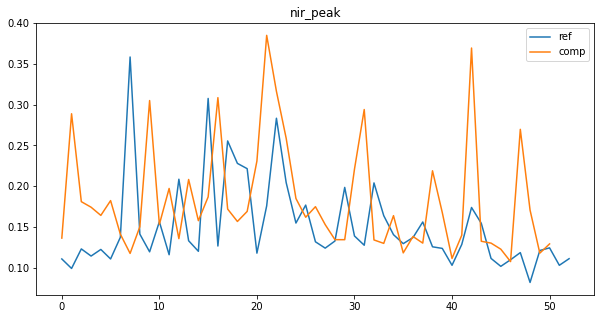

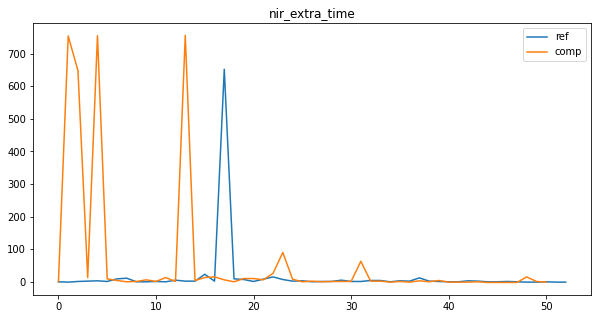

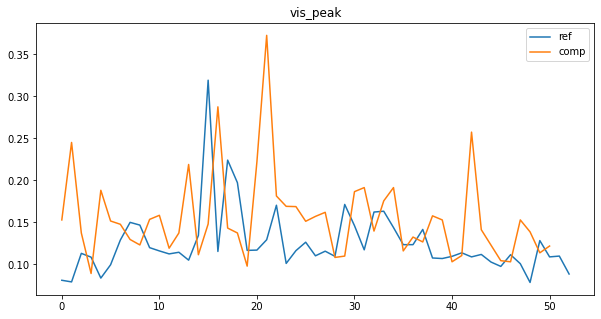

In [63]:
feature_list = ['lo_height_mean', 'lo_height_std', 'lo_fwhm', 'br_peak_time', 'nir_peak', 'nir_extra_time', 'vis_peak']
for i in feature_list:
    compare_feature_plot(ref, compare, i)